# Explore here

In [12]:
#En este proyecto practicarás con un conjunto de datos para crear un clasificador de reseñas de la tienda de Google Play.

In [13]:
# Your code here
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv')

df

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0
...,...,...,...
886,com.rovio.angrybirds,loved it i loooooooooooooovvved it because it...,1
887,com.rovio.angrybirds,all time legendary game the birthday party le...,1
888,com.rovio.angrybirds,ads are way to heavy listen to the bad review...,0
889,com.rovio.angrybirds,fun works perfectly well. ads aren't as annoy...,1


In [14]:
df2 = df.drop('package_name',axis=1)

In [15]:
df2.describe()

,polarity
count,891.000000
mean,0.344557
std,0.475490
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   review    891 non-null    object
 1   polarity  891 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.0+ KB


In [17]:
df2['review'] = df2['review'].str.strip().str.lower()

df2

,review,polarity
0,privacy at least put some option appear offlin...,0
1,"messenger issues ever since the last update, i...",0
2,profile any time my wife or anybody has more t...,0
3,the new features suck for those of us who don'...,0
4,forced reload on uploading pic on replying com...,0
...,...,...
886,loved it i loooooooooooooovvved it because it ...,1
887,all time legendary game the birthday party lev...,1
888,ads are way to heavy listen to the bad reviews...,0
889,fun works perfectly well. ads aren't as annoyi...,1


In [18]:
df2.shape

(891, 2)

<Axes: title={'center': 'Distribución de Ratings'}, xlabel='polarity'>

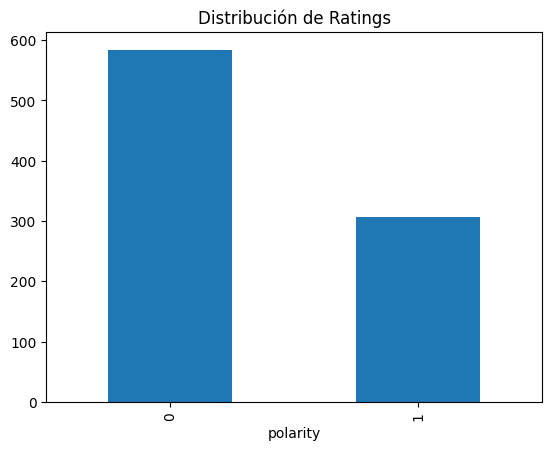

In [19]:
df2['polarity'].value_counts().plot(kind='bar', title='Distribución de Ratings')


<Axes: title={'center': 'Longitud promedio de comentarios'}, xlabel='polarity'>

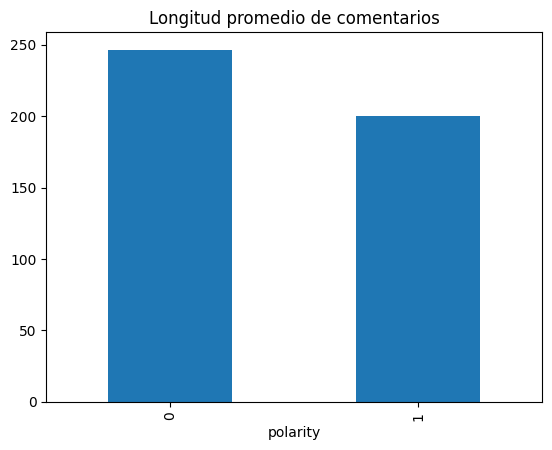

In [20]:
df2['review_length'] = df2['review'].apply(len)
df2.groupby('polarity')['review_length'].mean().plot(kind='bar', title='Longitud promedio de comentarios')


In [21]:
from sklearn.model_selection import train_test_split

X = df2['review']
y = df2['polarity']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
X_train

331    just did the latest update on viber and yet ag...
733    keeps crashing it only works well in extreme d...
382    the fail boat has arrived the 6.0 version is t...
704    superfast, just as i remember it ! opera mini ...
813    installed and immediately deleted this crap i ...
                             ...                        
106    why can't i share my achievements? recently di...
270    beta is the best version of the chrome browser...
860    great little game. this is a great little game...
435    keeps crashing ever since i started using it m...
102    even though i am loving the new update, but th...
Name: review, Length: 712, dtype: object

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

mod_vec = CountVectorizer(stop_words='english')
X_train_vec = mod_vec.fit_transform(X_train).toarray()
X_test_vec = mod_vec.transform(X_test).toarray()

len(X_test_vec[0])

3310

In [23]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_vec,y_train)

MultinomialNB()

In [24]:
y_pred = model.predict(X_test_vec)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0])

In [25]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.8156424581005587

In [26]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB

model_g = GaussianNB()
model_b = BernoulliNB()

model_g.fit(X_train_vec,y_train)
model_b.fit(X_train_vec,y_train)

print(f'Gaussian : {accuracy_score(y_test,model_g.predict(X_test_vec))} Bernoulli : {accuracy_score(y_test,model_b.predict(X_test_vec))}')

Gaussian : 0.8044692737430168 Bernoulli : 0.770949720670391


In [27]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)

model_rf.fit(X_train_vec,y_train)

accuracy_score(y_test,model_rf.predict(X_test_vec))

0.7988826815642458

In [ ]:
from sklearn.model_selection import GridSearchCV

grid ={
    'n_estimators':[50,100,150,200],
    'bootstrap':[True,False],
    'max_depth':[5,6,None]
}

grid_search = GridSearchCV(model_rf,grid,scoring='accuracy',cv=5)

grid_search.fit(X_train_vec,y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

In [ ]:
parameters = {  
'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)  
}  
grid_search= GridSearchCV(model, parameters)
grid_search.fit(X_train_vec,y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 1}
0.8103910174332709


In [ ]:
from sklearn.linear_model import LogisticRegression

model_rl = LogisticRegression()

model_rl.fit(X_train_vec,y_train)

accuracy_score(y_test,model_rl.predict(X_test_vec))


0.8324022346368715

In [ ]:
from pickle import dump

dump(model,open('../models/multinomial_NB_default.sav','wb'))
dump(model_rl,open('../models/reglog_default.sav','wb'))